# Organize demographic data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for stat of demographic
import pingouin as pg

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [56]:
# dm = pd.read_excel('demData.xlsx', dtype = {'sub_id': 'int'})
# dm['sub_id'] = dm['sub_id'].astype('string')
# for i in dm.iterrows():
#     if len(i[1]['sub_id'])<=2:
#         #print(i[1]['sub'])
#         sub = 'sub-0' + str(i[1]['sub_id'])
#     else:
#         sub = 'sub-' + str(i[1]['sub_id'])
#     #print(sub)
#     dm.at[i[0], 'sub_id'] = sub

In [57]:
#dm.to_csv('demographic.csv', index=False)

In [58]:
dm = pd.read_csv('demographic.csv')

In [59]:
dm['sub_id'].values

array(['sub-010', 'sub-016', 'sub-021', 'sub-026', 'sub-027', 'sub-030',
       'sub-032', 'sub-038', 'sub-043', 'sub-047', 'sub-048', 'sub-053',
       'sub-055', 'sub-056', 'sub-059', 'sub-062', 'sub-063', 'sub-065',
       'sub-066', 'sub-071', 'sub-072', 'sub-073', 'sub-075', 'sub-081',
       'sub-082', 'sub-083', 'sub-085', 'sub-086', 'sub-087', 'sub-102',
       'sub-103', 'sub-132', 'sub-144', 'sub-160', 'sub-165', 'sub-166',
       'sub-169', 'sub-177', 'sub-178', 'sub-179', 'sub-182', 'sub-184',
       'sub-185', 'sub-186', 'sub-203', 'sub-204', 'sub-205', 'sub-1205',
       'sub-1222', 'sub-1223', 'sub-1232', 'sub-100', 'sub-105',
       'sub-121', 'sub-126', 'sub-130', 'sub-150', 'sub-152', 'sub-153',
       'sub-154', 'sub-158', 'sub-167', 'sub-168', 'sub-170', 'sub-171',
       'sub-172', 'sub-173', 'sub-189', 'sub-193', 'sub-196', 'sub-200',
       'sub-202', 'sub-001', 'sub-004', 'sub-005', 'sub-008', 'sub-011',
       'sub-019', 'sub-020', 'sub-022', 'sub-024', 'sub-08

In [60]:
dm.describe()

,Gender,Age
count,85.000000,85.000000
mean,1.200000,29.682353
std,0.402374,7.509061
min,1.000000,18.000000
25%,1.000000,24.000000
50%,1.000000,28.000000
75%,1.000000,33.000000
max,2.000000,51.000000


In [61]:
dm.groupby('Gender').count()

,sub_id,group,Age
Gender,,,
1.0,68,68,68
2.0,17,17,17


In [62]:
dm.groupby('group').count()

,sub_id,Gender,Age
group,,,
HC,30,30,30
VCC,29,29,29
VPTSD,26,26,26


In [63]:
dm.groupby('group').describe()

Gender                                                Age             \
       count      mean       std  min  25%  50%  75%  max count       mean   
group                                                                        
HC      30.0  1.400000  0.498273  1.0  1.0  1.0  2.0  2.0  30.0  24.600000   
VCC     29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0  29.0  31.620690   
VPTSD   26.0  1.115385  0.325813  1.0  1.0  1.0  1.0  2.0  26.0  33.384615   

                                                
            std   min    25%   50%   75%   max  
group                                           
HC     3.728733  18.0  22.00  24.0  26.0  34.0  
VCC    7.752483  21.0  26.00  29.0  36.0  46.0  
VPTSD  7.510403  21.0  29.25  31.5  36.5  51.0

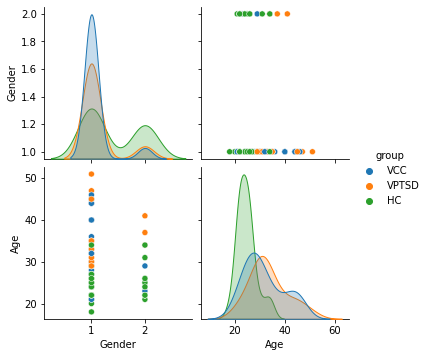

In [64]:
sns.pairplot(dm, hue='group')

In [65]:
pg.anova(data=dm, dv='Age', between='group')
# there is a group difference (HC are younger)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,82,14.544419,0.000004,0.261852


In [66]:
pg.chi2_independence(dm, 'group', 'Gender') # also HC are more equivalent compared to combat groups

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Gender   1.0  2.0
 group            
 HC      24.0  6.0
 VCC     23.2  5.8
 VPTSD   20.8  5.2,
 Gender  1.0  2.0
 group           
 HC       18   12
 VCC      27    2
 VPTSD    23    3,
                  test    lambda       chi2  dof      pval    cramer     power
 0             pearson  1.000000  11.775531  2.0  0.002773  0.372204  0.876834
 1        cressie-read  0.666667  11.587749  2.0  0.003046  0.369224  0.871311
 2      log-likelihood  0.000000  11.535721  2.0  0.003126  0.368394  0.869743
 3       freeman-tukey -0.500000  11.793654  2.0  0.002748  0.372490  0.877356
 4  mod-log-likelihood -1.000000  12.341420  2.0  0.002090  0.381042  0.892242
 5              neyman -2.000000  14.578583  2.0  0.000683  0.414141  0.937717)

In [67]:
dfAll = pd.read_csv('../scr_amg_hipp_all.csv')

In [68]:
# find were same subject occur
both = set(dfAll['sub'].unique()).intersection(dm['sub_id'].unique()) 
len(both)

65

In [69]:
# grab demographic only of those in both
dm_clean = dm[dm['sub_id'].isin(both)]
dm_clean.head()

,sub_id,group,Gender,Age
0,sub-010,VCC,2.0,29.0
1,sub-016,VCC,1.0,25.0
3,sub-026,VPTSD,1.0,32.0
4,sub-027,VCC,1.0,35.0
5,sub-030,VPTSD,1.0,44.0


In [70]:
len(dm_clean['sub_id'])

65

In [71]:
dm_clean.describe()

,Gender,Age
count,65.000000,65.000000
mean,1.184615,30.353846
std,0.391005,7.657575
min,1.000000,18.000000
25%,1.000000,25.000000
50%,1.000000,29.000000
75%,1.000000,34.000000
max,2.000000,51.000000


In [83]:
dm_clean.groupby(['group','Gender']).describe()

Age                                                     
             count       mean       std   min    25%   50%    75%   max
group Gender                                                           
HC    1.0     12.0  23.750000  3.250874  18.0  21.75  24.0  26.25  29.0
      2.0      7.0  26.428571  4.503967  21.0  24.00  25.0  28.50  34.0
VCC   1.0     23.0  32.434783  7.328810  24.0  27.00  30.0  38.00  46.0
      2.0      2.0  26.000000  4.242641  23.0  24.50  26.0  27.50  29.0
VPTSD 1.0     18.0  32.944444  8.591872  21.0  27.50  30.5  35.00  51.0
      2.0      3.0  37.333333  3.511885  34.0  35.50  37.0  39.00  41.0

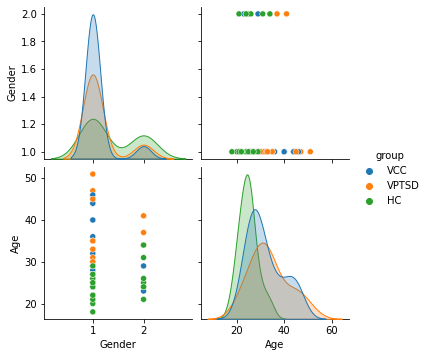

In [72]:
sns.pairplot(dm_clean, hue='group')

In [73]:
pg.ttest(dm_clean['Age'][dm_clean['group']=='VPTSD'], dm_clean['Age'][dm_clean['group']=='HC'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.443377,29.194759,two-sided,0.000117,"[4.77, 12.9]",1.362001,279.363,0.987148


In [74]:
pg.anova(data=dm_clean, dv='Age', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,62,9.470324,0.000258,0.234007


Indeed age is significantly different between healthy controls and PTSD/CC groups

In [75]:
pg.chi2_independence(dm_clean, 'group', 'Gender')

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Gender        1.0       2.0
 group                      
 HC      15.492308  3.507692
 VCC     20.384615  4.615385
 VPTSD   17.123077  3.876923,
 Gender  1.0  2.0
 group           
 HC       12    7
 VCC      23    2
 VPTSD    18    3,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  6.325105  2.0  0.042318  0.311944  0.608265
 1        cressie-read  0.666667  6.169202  2.0  0.045748  0.308076  0.596769
 2      log-likelihood  0.000000  6.010109  2.0  0.049536  0.304078  0.584808
 3       freeman-tukey -0.500000  6.019920  2.0  0.049294  0.304326  0.585552
 4  mod-log-likelihood -1.000000  6.143032  2.0  0.046351  0.307422  0.594817
 5              neyman -2.000000  6.775240  2.0  0.033789  0.322854  0.640199)

In [76]:
pg.chi2_independence(dm_clean[dm_clean['group']!='HC'], 'group', 'Gender')

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


(Gender        1.0       2.0
 group                      
 VCC     22.282609  2.717391
 VPTSD   18.717391  2.282609,
 Gender   1.0  2.0
 group            
 VCC     22.5  2.5
 VPTSD   18.5  2.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.042741  1.0  0.836214  0.030482  0.054910
 1        cressie-read  0.666667  0.042688  1.0  0.836313  0.030463  0.054904
 2      log-likelihood  0.000000  0.042600  1.0  0.836481  0.030432  0.054894
 3       freeman-tukey -0.500000  0.042547  1.0  0.836580  0.030413  0.054888
 4  mod-log-likelihood -1.000000  0.042507  1.0  0.836657  0.030398  0.054883
 5              neyman -2.000000  0.042462  1.0  0.836741  0.030382  0.054878)

In [82]:
dm_clean[dm_clean['group']=='HC']

,sub_id,group,Gender,Age
51,sub-100,HC,1.0,20.0
54,sub-126,HC,1.0,24.0
55,sub-130,HC,1.0,26.0
56,sub-150,HC,1.0,24.0
57,sub-152,HC,2.0,24.0
58,sub-153,HC,1.0,22.0
59,sub-154,HC,1.0,18.0
60,sub-158,HC,1.0,21.0
61,sub-167,HC,2.0,34.0
62,sub-168,HC,2.0,25.0


Gender also divides differently in HC group